## Assignment 3 - Fitting

**D/ENG/21/0108/EE**  
**M.W.M Shakir**

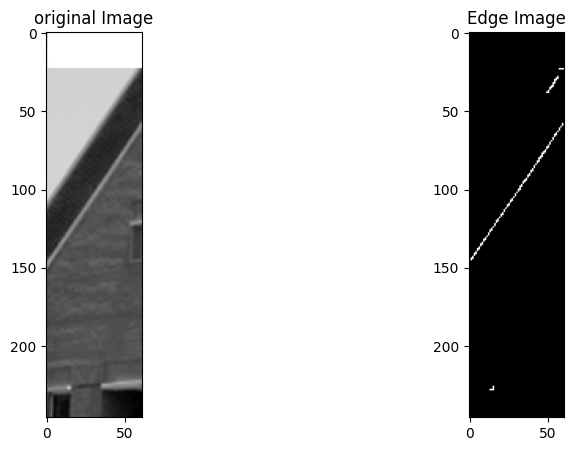

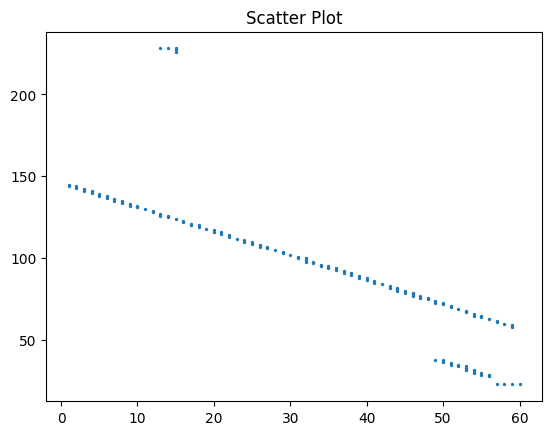

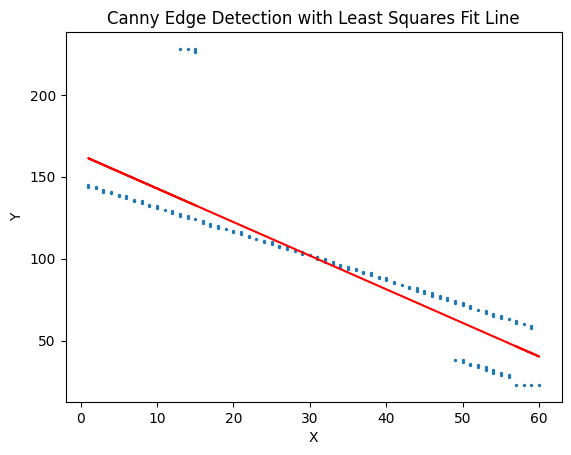

Estimated roof angle: -64.01 degrees


C:\Users\shaki\AppData\Roaming\Python\Python311\site-packages\IPython\core\interactiveshell.py:3460: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\shaki\AppData\Roaming\Python\Python311\site-packages\IPython\core\interactiveshell.py:3460: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\shaki\AppData\Roaming\Python\Python311\site-packages\IPython\core\interactiveshell.py:3460: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\shaki\AppData\Roaming\Python\Python311\site-packages\IPython\core\interactiveshell.py:3460: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\shaki\AppData\Roaming\Python\Python311\site-packages\IPython\core\interactiveshell.py:3460: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


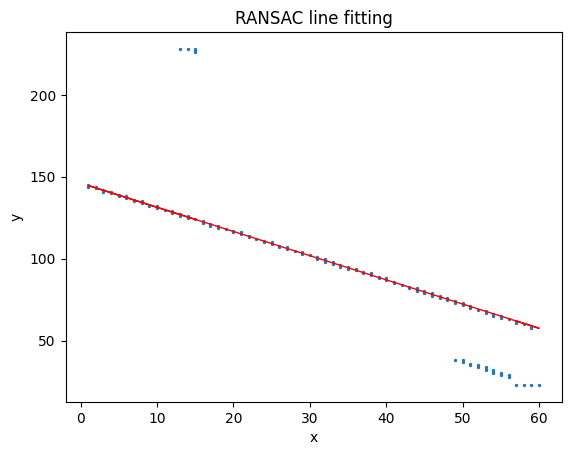

Estimated roof angle Using Ransac: -55.89 degrees


In [8]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img = cv.imread('Images/building_crop.jpg', cv.IMREAD_GRAYSCALE)


edges = cv.Canny(img, 350 , 390)
indices = np.where(edges != [0])
x = indices[1]
y = indices[0]

fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(img, cmap='gray')
axs[0].set_title("original Image")
axs[1].imshow(edges.astype('uint8'), cmap='gray')
axs[1].set_title("Edge Image")

plt.show()

plt.scatter(x, y, s=2)
plt.title('Scatter Plot')
plt.show()

A = np.vstack([x, np.ones(len(x))]).T
m, c = np.linalg.lstsq(A, y, rcond=None)[0]

plt.scatter(x, y, s=2)
plt.plot(x, m*x + c, 'r')
plt.title('Canny Edge Detection with Least Squares Fit Line')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

angle_degrees = np.arctan(m) * 180 / np.pi

# estimated value of roof angle
print("Estimated roof angle: {:.2f} degrees".format(angle_degrees))

# RANSAC parameters
n_iterations = 1000
n_points = 2
threshold = 5

# Initializing variables for best line and inliers
best_line = None
max_inliers = 0

# Running RANSAC algorithm
for i in range(n_iterations):

    sample_indices = np.random.choice(len(x), size=n_points, replace=False)
    sample_x = x[sample_indices]
    sample_y = y[sample_indices]

    line = np.polyfit(sample_x, sample_y, 1)

    distances = np.abs(line[0]*x - y + line[1]) / np.sqrt(line[0]**2 + 1)

    inliers = np.sum(distances < threshold)

    if inliers > max_inliers:
        best_line = line
        max_inliers = inliers

#slope and intercept of the best line
m, c = best_line

# scatter plot and estimated RANSAC line
plt.figure()
plt.scatter(x, y, s=2)
plt.plot(x, m*x + c, color='red', linewidth=1)
plt.title('RANSAC line fitting')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# Calculating roof angle from RANSAC line
roof_angle = np.arctan(m) * 180 / np.pi

# estimated roof angle
print(f"Estimated roof angle Using Ransac: {roof_angle:.2f} degrees")

**Q6.**

**Estimated roof angle: -64.01 degrees**

- Accuracy of the estimated roof angle depends on the quality and quantity of data points used to calculate the least-squares-fit line.  
- Since there are some outliers the accuracy of estimated angle is low.  
- It is also clear from the plot. The least square line and the scatter plot dont align fully

**Q10.**

RANSAC Algorithm

**Q13.**

**Estimated roof angle: -55.89 degrees**

- Compared to least squared fit line the scatter plot aligns with the RANSAC Plot. 
- The obtained roof angle is much more accurate than the LS method using RANSAC method